In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Import Libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# Read Data

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

# Basic Data Exploration

In [4]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test.columns # Miss one column named "Survived", which is the depantant variable

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

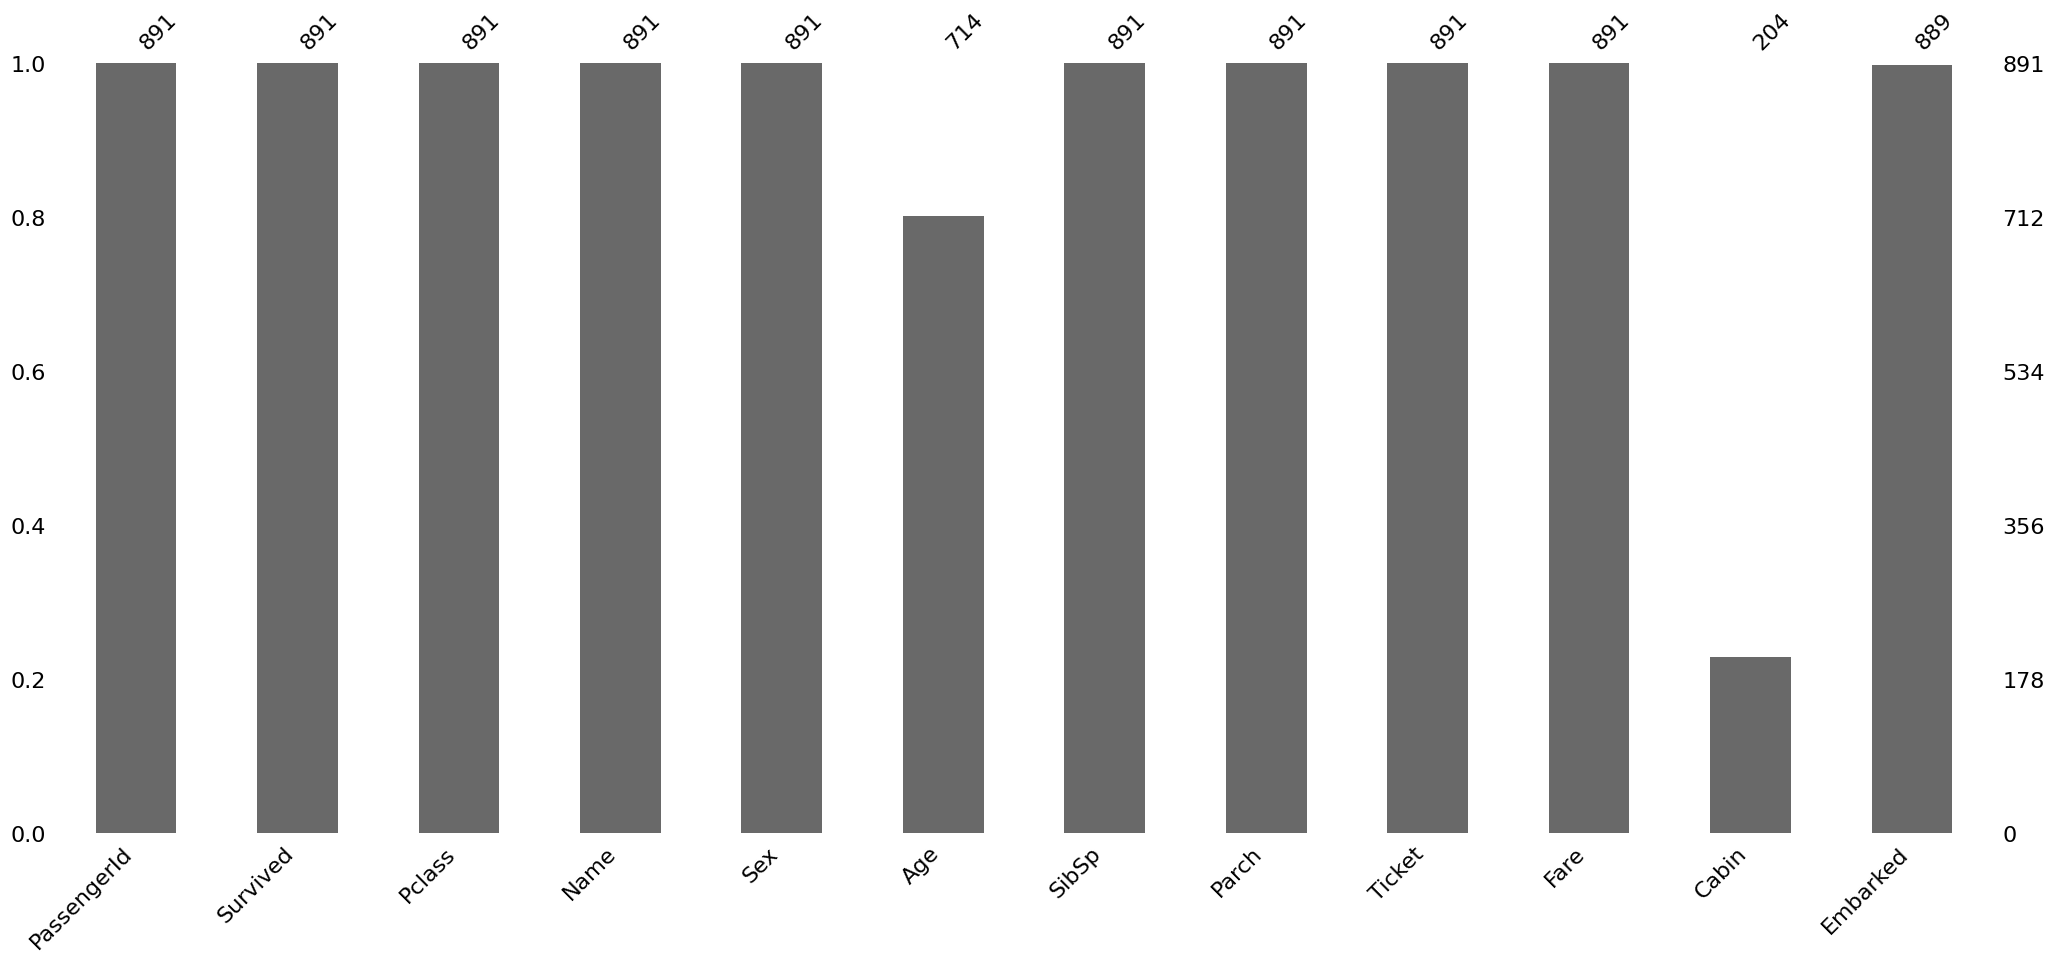

In [8]:
msno.bar(df = train)

In [9]:
train.isna().mean() # Check the Null Ratio

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
train.Survived.mean() # Survial Rate in train data

0.3838383838383838

In [11]:
test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

<Axes: >

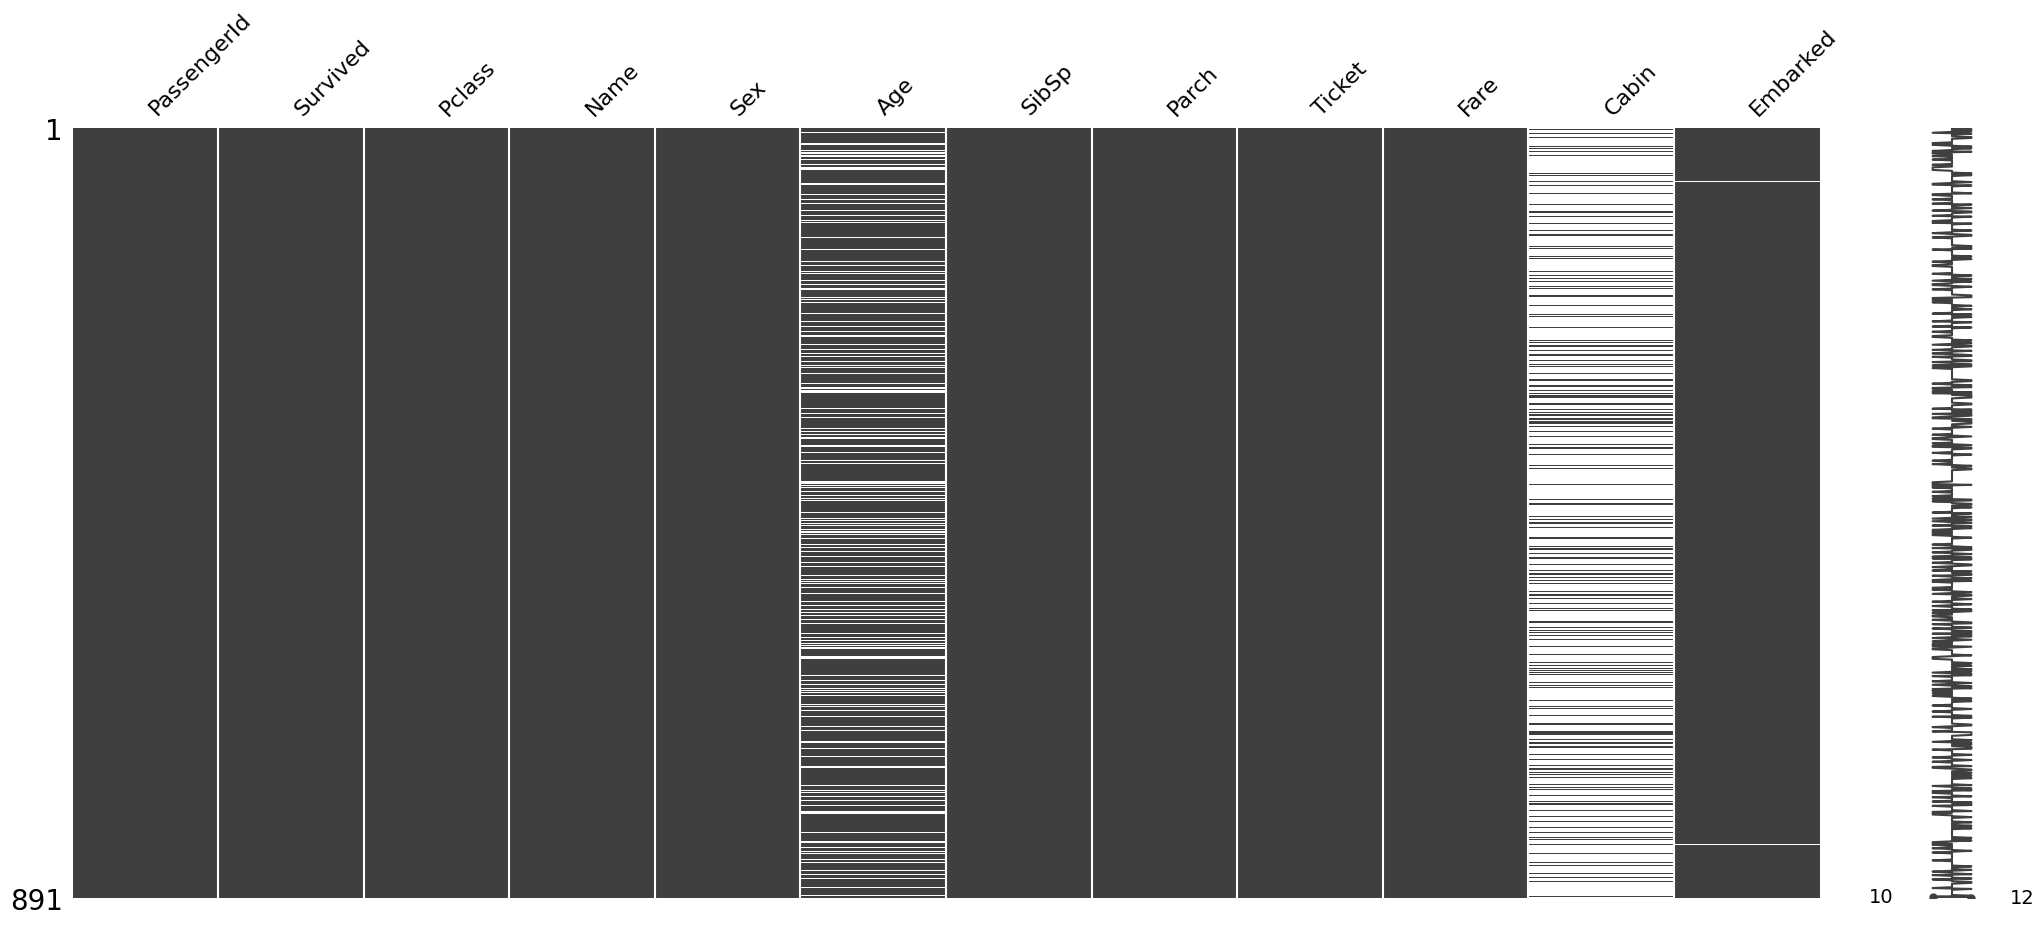

In [12]:
msno.matrix(df = train)

In [13]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
train.Cabin.nunique()

147

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1. 데이터 전처리 및 범주형 변수 인코딩

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 복사본 생성
df = train.copy()

# 결측치 처리
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']]) #Age 칼럼의 결측치는 중간값으로 대체 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #Embarked 칼럼의 결측치는 중간값(최빈값)으로 대체

# 필요 없는 컬럼 제거: 해당 4개의 칼럼을 제외한 7개의 칼럼으로 생존율 예측 모델링
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# 범주형 변수 인코딩
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 특성과 타겟 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 훈련/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


In [18]:
X_val.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0


In [19]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [20]:
y_val.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [21]:
print( X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(712, 7) (179, 7) (712,) (179,)


# 2. 데이터 모델링 및 결과 검증 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 결과 저장용 딕셔너리
results = {}

# 각 모델 학습 및 검증
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results[name] = acc

results

{'Logistic Regression': 0.8100558659217877,
 'Random Forest': 0.8212290502793296,
 'KNN': 0.7039106145251397,
 'XGBoost': 0.7877094972067039}

# 3. 스케일링 이후 로지스틱 회귀분석 모델링

In [23]:
# 스케일링에 필요한 라이브러리 불러기기
from sklearn.preprocessing import StandardScaler


# 1. 데이터 불러오기
train_df = train
test_df = test
test_passenger_ids = test_df["PassengerId"]

# 2. 공통 전처리 함수 정의
def preprocess(df, is_train=True):
    df = df.copy()
    df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
    df["Age"] = df["Age"].fillna(train_df["Age"].median())
    df["Fare"] = df["Fare"].fillna(train_df["Fare"].median())
    df["Embarked"] = df["Embarked"].fillna("S")
    
    # Label Encoding
    df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
    df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])
    
    return df

# 3. 데이터 전처리
train_df = preprocess(train_df)
test_df = preprocess(test_df, is_train=False)

# 4. 특성/타겟 분리
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]
X_test = test_df.drop(columns=["PassengerId"])

# 5. 스케일링 대상 변수만 변환 (Age, Fare)
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])
X_test[["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])

# 6. 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 8. 검증 정확도 확인
val_preds = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))

# 9. test 데이터 예측 및 저장
test_preds = model.predict(X_test)
submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_preds
})
submission.to_csv("logreg_submission.csv", index=False)
print("예측 결과가 'logreg_submission.csv' 파일에 저장되었습니다.")


Validation Accuracy: 0.8100558659217877
예측 결과가 'logreg_submission.csv' 파일에 저장되었습니다.


# 4.모델 성능 교차 검증

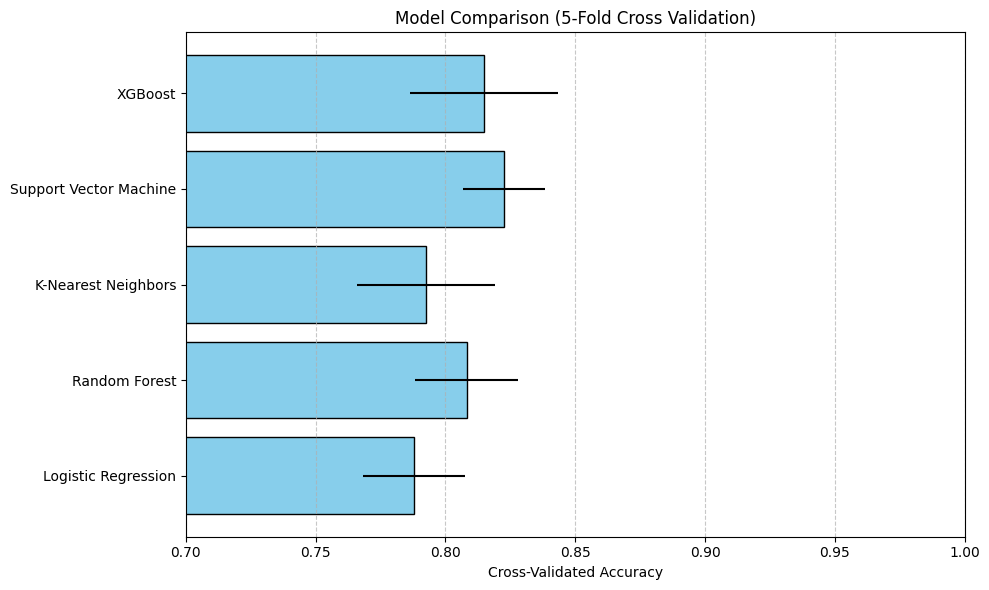

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# 사용할 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 교차 검증 실행 및 결과 저장
model_names = []
mean_scores = []
std_scores = []

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    model_names.append(name)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(model_names, mean_scores, xerr=std_scores, color='skyblue', edgecolor='black')
plt.xlabel("Cross-Validated Accuracy")
plt.title("Model Comparison (5-Fold Cross Validation)")
plt.xlim(0.7, 1.0)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. 최종 모델 선정 및 자료 제출

In [25]:
from sklearn.svm import SVC

# SVM 모델 정의 및 학습 (최종 모델)
svm_model = SVC()
svm_model.fit(X, y)

# 테스트 데이터에 예측 수행
svm_test_preds = svm_model.predict(X_test)

# 예측 결과 저장
svm_submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": svm_test_preds
})
svm_submission_path = "/kaggle/working/svm_submission.csv"
svm_submission.to_csv(svm_submission_path, index=False)

svm_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
from sklearn.svm import SVC
import pandas as pd

# 1. SVM 모델 정의 및 학습
svm_model = SVC()
svm_model.fit(X, y)  # X: train features, y: train target

# 2. test 데이터 예측
svm_test_preds = svm_model.predict(X_test)  # X_test: 전처리 및 스케일링된 test 데이터

# 3. 결과 저장
svm_submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,  # test_df에서 분리한 PassengerId
    "Survived": svm_test_preds
})
svm_submission.to_csv("svm_submission.csv", index=False)
print("✅ 예측 결과 저장 완료: svm_submission.csv")


✅ 예측 결과 저장 완료: svm_submission.csv
